In [58]:
from netCDF4 import Dataset
import numpy as np

In [59]:
nc = Dataset('data/sbmn_cappi_20140103_031208.nc','r')

Extracting and plotting point Data

In [60]:
nc.dimensions.keys()

odict_keys(['time', 'bounds', 'x0', 'y0', 'z0'])

In [61]:
#fh.variables.keys()
for i in nc.variables:
    print ([i,nc.variables[i].shape])

['time', (1,)]
['start_time', (1,)]
['stop_time', (1,)]
['time_bounds', (1, 2)]
['x0', (241,)]
['y0', (241,)]
['lat0', (241, 241)]
['lon0', (241, 241)]
['z0', (40,)]
['grid_mapping_0', ()]
['VEL', (1, 40, 241, 241)]
['DBZc', (1, 40, 241, 241)]
['range', (1, 40, 241, 241)]
['Coverage', (1, 40, 241, 241)]


In [62]:
nc.variables['x0'].units

'km'

In [63]:
lons = nc.variables['lon0'][:]
lats = nc.variables['lat0'][:]
dbz = nc.variables['DBZc'][:][0][0:240]

dbz_units = nc.variables['DBZc'].units


## Ploting georefeced data

In [64]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [65]:
lat_0 = lats.mean()
lon_0 = lons.mean()

m = Basemap(width=5000000,height=3500000,
            resolution='l',projection='stere',\
            lat_ts=40,lat_0=lat_0,lon_0=lon_0,)

/ssd/miniconda3/envs/cap394/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


In [176]:
# Because our lon and lat variables are 1D,
# use meshgrid to create 2D arrays
# Not necessary if coordinates are already in 2D arrays.
lon , lat = np.meshgrid(lons[0][:], lats[0][:])
xi, yi = m(lon, lat)

In [ ]:
dbz = nc.variables['DBZc'][:][0][0:240].data
A = dbz[0]
B = dbz[1]

teste = np.nansum(A+B)

conct = A + B
teste

In [ ]:
np.savetxt("./data/A2.csv", A2, delimiter=",")

## Importação

In [359]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl
import pyart
import warnings
warnings.simplefilter("ignore", category=DeprecationWarning)

%matplotlib inline

In [360]:
xds = xr.open_dataset('data/sbmn_cappi_20140103_031208.nc')

In [361]:
lat = xds.DBZc['lat0'].data
lon = xds.DBZc['lon0'].data

In [362]:
a = xds['DBZc'].data[0][0]
b = xds['DBZc'].data[0][1]

In [363]:
result = np.where(
    np.isnan(a+b),
    np.where(np.isnan(a), b, a), 
    (a+b)/2
)
result
np.savetxt("./data/result.csv", result, delimiter=",")

## Média Geral

In [364]:
def somaMat(a,b):
    result = np.where(
    np.isnan(a+b),
    np.where(np.isnan(a), b, a), 
    (a+b)
    )
    return result

In [365]:
total = xds['DBZc'].data[0][0]
for i in range(1,40,1):
    
    a = xds['DBZc'].data[0][i]
    total = somaMat(total,a)
    
np.savetxt("./data/soma40.csv", total/40, delimiter=",")

In [366]:
dbz2 = total

In [367]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [368]:
lat0 = lat.mean()
lon0 = lon.mean()

In [369]:
lat_ = np.ma.MaskedArray(lat)
lon_ = np.ma.MaskedArray(lon)

In [370]:
xi, yi = m(lon_, lat_)
dados = np.nan_to_num(dbz2)

/ssd/miniconda3/envs/cap394/lib/python3.6/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if sys.path[0] == '':
/ssd/miniconda3/envs/cap394/lib/python3.6/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/ssd/miniconda3/envs/cap394/lib/python3.6/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


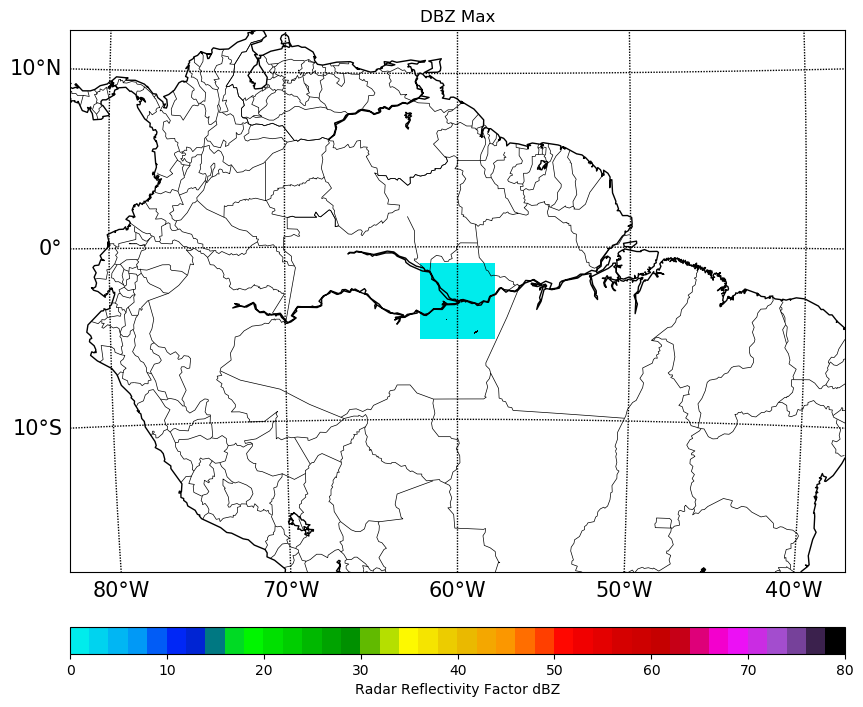

In [372]:
fig, axes = plt.subplots(nrows=1,ncols=1,figsize=(10,10),dpi=100)
label = 'Radar Reflectivity Factor ' + dbz_units+ ''

levs = np.linspace(0,80,41,endpoint=True)
norm = mpl.colors.BoundaryNorm(levs,256)
cmap = 'pyart_NWSRef'
ax = axes

m = Basemap(width=5000000,height=3500000,
            resolution='l',projection='stere',\
            area_thresh=1000,\
            lat_ts=40,lat_0=lat_0,lon_0=lon_0)


# m = Basemap(projection='lcc',lon_0=lon0,lat_0=lat0,
#            llcrnrlat=lat0-10.25,llcrnrlon=lon0-8.5,
#            urcrnrlat=lat0+10.25,urcrnrlon=lon0+8.5,resolution='l')

cs = m.pcolormesh(xi,yi,dados,norm=norm,cmap=cmap,ax=ax,latlon=False)

# # # # Add Grid Lines
m.drawparallels(np.arange(-80., 81., 10.), labels=[1,0,0,0], fontsize=15)
m.drawmeridians(np.arange(-180., 181., 10.), labels=[0,0,0,1], fontsize=15)


# # # # # Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
m.drawstates()
m.drawcountries()

# # # # # Add Colorbar
cbar = m.colorbar(cs, location='bottom', pad="10%")
cbar.set_label(label)

# # # # # Add Title
plt.title('DBZ Max')

plt.show()

In [256]:
refl

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)